In [30]:
import pandas as pd
import numpy as np

#plot

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

#register converters

In [32]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

#setting plot size

In [33]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']= 30,20

#normalization

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

#read data

In [35]:
df = pd.read_csv("NSE-TATAGLOBAL11.csv")

#print the head

In [36]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


#set index as date

In [37]:
df['Date'] = pd.to_datetime(df.Date, format = '%Y-%m-%d')
df.index = df['Date']

#plot

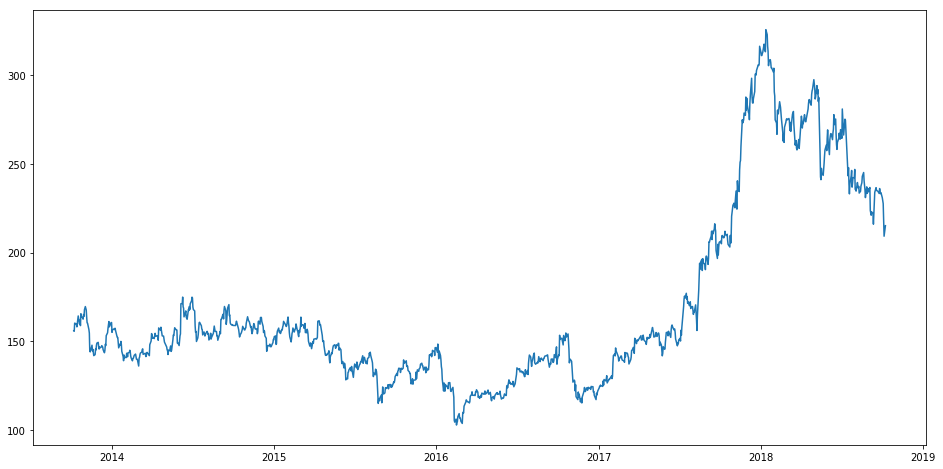

In [38]:
plt.figure(figsize=(16, 8))
plt.plot(df['Close'], label = 'Close Price History')

In [39]:
from pmdarima import auto_arima

In [40]:
data = df.sort_index(ascending=True, axis=0)

train = data[:987]
valid = data[987:]

In [41]:
training = train['Close']
validation = valid['Close']

In [46]:
model = auto_arima(training, start_p=1, d=1, start_q=1, max_p=3, max_q=3, start_P=0, m=12, seasonal=True, stationary=False, trace=True, error_action='ignore', suppress_warning=True)
model.fit(training)

C:\Users\NaDe1L\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\NaDe1L\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 1, 12); AIC=4821.557, BIC=4846.025, Fit time=1.885 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=4819.457, BIC=4829.245, Fit time=0.026 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 12); AIC=4819.586, BIC=4839.161, Fit time=0.377 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 12); AIC=4819.592, BIC=4839.167, Fit time=0.443 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 0, 12); AIC=4817.630, BIC=4832.311, Fit time=0.281 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 1, 12); AIC=4819.198, BIC=4838.773, Fit time=0.822 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(2, 0, 1, 12); AIC=4820.780, BIC=4845.249, Fit time=2.580 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 0, 12); AIC=4819.588, BIC=4839.163, Fit time=0.395 seconds


C:\Users\NaDe1L\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\NaDe1L\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 0, 12); AIC=4821.553, BIC=4846.021, Fit time=1.053 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(2, 0, 0, 12); AIC=4819.626, BIC=4839.201, Fit time=1.286 seconds
Total fit time: 9.176 seconds


ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(0, 1, 0),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(1, 0, 0, 12), solver='lbfgs', start_params=None,
   suppress_warnings=False, transparams=True, trend=None,
   with_intercept=True)

In [47]:
forecast = model.predict(n_periods=248)
forecast = pd.DataFrame(forecast, index = valid.index, columns=['Prediction'])

result

In [48]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(forecast['Prediction'])),2)))
rms

54.71081122591122

plot

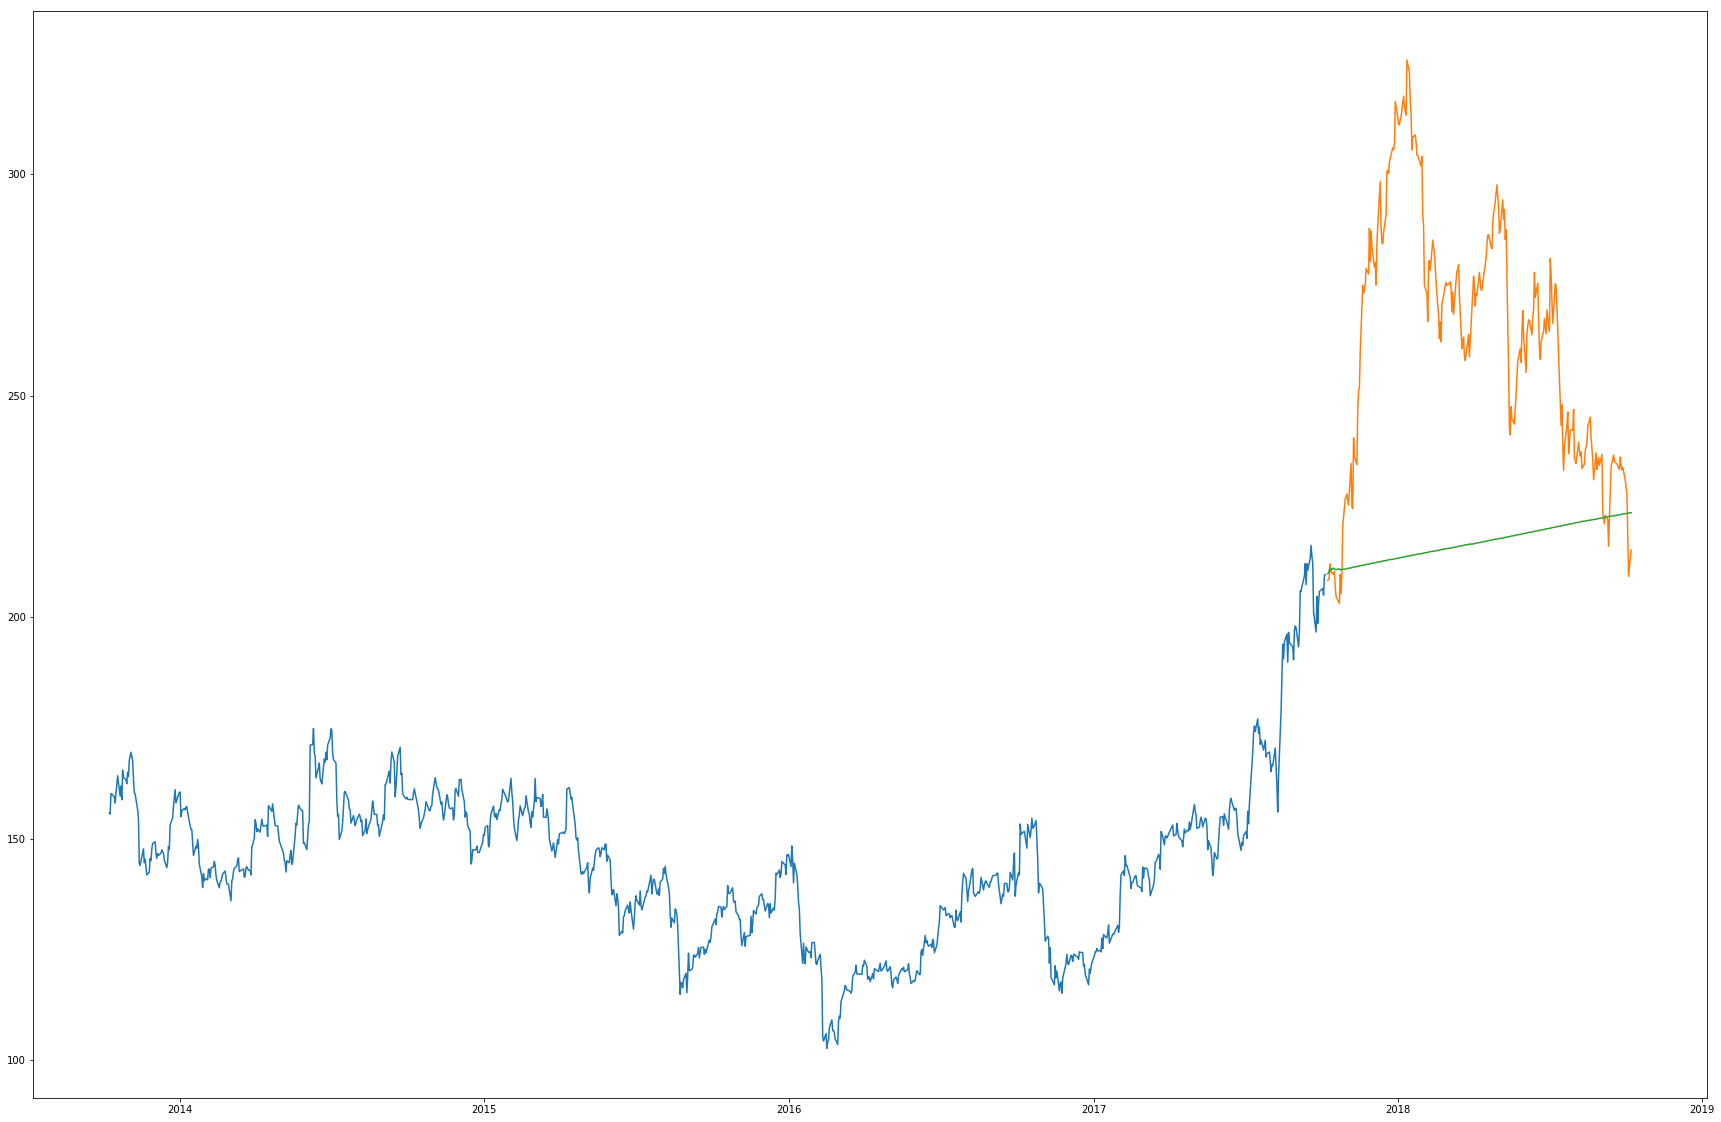

In [45]:
plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(forecast['Prediction'])